In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("iris new.csv")
df

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class,Unnamed: 5,Unnamed: 6,alpha,obj,Unnamed: 9,Unnamed: 10
0,7.0,3.2,4.7,1.4,Iris-versicolor,NaN,0.0,0.0,0.0,0,1
1,6.4,3.2,4.5,1.5,Iris-versicolor,NaN,0.0,NaN,NaN,0,1
2,6.9,3.1,4.9,1.5,Iris-versicolor,NaN,0.0,NaN,NaN,0,1
3,5.5,2.3,4.0,1.3,Iris-versicolor,NaN,0.0,NaN,NaN,0,1
4,6.5,2.8,4.6,1.5,Iris-versicolor,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,4.8,3.0,1.4,0.3,Iris-setosa,NaN,NaN,NaN,NaN,0,1
96,5.1,3.8,1.6,0.2,Iris-setosa,NaN,NaN,NaN,NaN,0,1
97,4.6,3.2,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN,0,1
98,5.3,3.7,1.5,0.2,Iris-setosa,NaN,NaN,NaN,NaN,0,1


In [3]:
df.head(8)

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class,Unnamed: 5,Unnamed: 6,alpha,obj,Unnamed: 9,Unnamed: 10
0,7.0,3.2,4.7,1.4,Iris-versicolor,NaN,0.0,0.0,0.0,0,1
1,6.4,3.2,4.5,1.5,Iris-versicolor,NaN,0.0,NaN,NaN,0,1
2,6.9,3.1,4.9,1.5,Iris-versicolor,NaN,0.0,NaN,NaN,0,1
3,5.5,2.3,4.0,1.3,Iris-versicolor,NaN,0.0,NaN,NaN,0,1
4,6.5,2.8,4.6,1.5,Iris-versicolor,NaN,NaN,NaN,NaN,0,1
5,5.7,2.8,4.5,1.3,Iris-versicolor,NaN,NaN,NaN,NaN,0,1
6,6.3,3.3,4.7,1.6,Iris-versicolor,NaN,NaN,NaN,NaN,0,1
7,4.9,2.4,3.3,1.0,Iris-versicolor,NaN,NaN,NaN,NaN,0,1


In [5]:
odd = df.iloc[1::2]
print(odd)

    Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
1                 6.4               3.2                4.5               1.5   
3                 5.5               2.3                4.0               1.3   
5                 5.7               2.8                4.5               1.3   
7                 4.9               2.4                3.3               1.0   
9                 5.2               2.7                3.9               1.4   
11                5.9               3.0                4.2               1.5   
13                6.1               2.9                4.7               1.4   
15                6.7               3.1                4.4               1.4   
17                5.8               2.7                4.1               1.0   
19                5.6               2.5                3.9               1.1   
21                6.1               2.8                4.0               1.3   
23                6.1               2.8 

In [6]:
n = 5  
if n % 2 == 0 or n > len(odd):
    raise ValueError("n must be an odd number and less than or equal to the number of odd rows")
sampled_odd = odd.sample(n=n)
print(sampled_odd)

    Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
11                5.9               3.0                4.2               1.5   
43                5.0               2.3                3.3               1.0   
61                4.8               3.4                1.6               0.2   
77                5.2               3.5                1.5               0.2   
7                 4.9               2.4                3.3               1.0   

              Class  Unnamed: 5  Unnamed: 6  alpha  obj  Unnamed: 9  \
11  Iris-versicolor         NaN         NaN    NaN  NaN           0   
43  Iris-versicolor         NaN         NaN    NaN  NaN           0   
61      Iris-setosa         NaN         NaN    NaN  NaN           0   
77      Iris-setosa         NaN         NaN    NaN  NaN           0   
7   Iris-versicolor         NaN         NaN    NaN  NaN           0   

    Unnamed: 10  
11            1  
43            1  
61            1  
77            1  
7 

In [9]:
num = df.shape[1]
print('number of colums: ',num)
column_names = df.columns.tolist()
print('name of columns: ',column_names)

number of colums:  11
name of columns:  ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)', 'Class', 'Unnamed: 5', 'Unnamed: 6', 'alpha', 'obj', 'Unnamed: 9', 'Unnamed: 10']


In [4]:
df.shape

(100, 11)

In [11]:
slice = df.iloc[10:21]
print(slice)

    Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
10                5.0               2.0                3.5               1.0   
11                5.9               3.0                4.2               1.5   
12                6.0               2.2                4.0               1.0   
13                6.1               2.9                4.7               1.4   
14                5.6               2.9                3.6               1.3   
15                6.7               3.1                4.4               1.4   
16                5.6               3.0                4.5               1.5   
17                5.8               2.7                4.1               1.0   
18                6.2               2.2                4.5               1.5   
19                5.6               2.5                3.9               1.1   
20                5.9               3.2                4.8               1.8   

              Class  Unnamed: 5  Unname

In [13]:
dis_col = ['Sepal Length (cm)', 'Petal Length (cm)', 'Unnamed: 6']

specific = df[dis_col]

print(specific)

    Sepal Length (cm)  Petal Length (cm)  Unnamed: 6
0                 7.0                4.7         0.0
1                 6.4                4.5         0.0
2                 6.9                4.9         0.0
3                 5.5                4.0         0.0
4                 6.5                4.6         NaN
..                ...                ...         ...
95                4.8                1.4         NaN
96                5.1                1.6         NaN
97                4.6                1.4         NaN
98                5.3                1.5         NaN
99                5.0                1.4         NaN

[100 rows x 3 columns]


In [15]:
s = df.iloc[10:21]

print(s)

    Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
10                5.0               2.0                3.5               1.0   
11                5.9               3.0                4.2               1.5   
12                6.0               2.2                4.0               1.0   
13                6.1               2.9                4.7               1.4   
14                5.6               2.9                3.6               1.3   
15                6.7               3.1                4.4               1.4   
16                5.6               3.0                4.5               1.5   
17                5.8               2.7                4.1               1.0   
18                6.2               2.2                4.5               1.5   
19                5.6               2.5                3.9               1.1   
20                5.9               3.2                4.8               1.8   

              Class  Unnamed: 5  Unname

In [16]:
s2 = df.loc[20:30]

print(s2)

    Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
20                5.9               3.2                4.8               1.8   
21                6.1               2.8                4.0               1.3   
22                6.3               2.5                4.9               1.5   
23                6.1               2.8                4.7               1.2   
24                6.4               2.9                4.3               1.3   
25                6.6               3.0                4.4               1.4   
26                6.8               2.8                4.8               1.4   
27                6.7               3.0                5.0               1.7   
28                6.0               2.9                4.5               1.5   
29                5.7               2.6                3.5               1.0   
30                5.5               2.4                3.8               1.1   

              Class  Unnamed: 5  Unname

In [17]:
c_name = 'Sepal Length (cm)'
c_sum = df[c_name].sum()

c_mean = df[c_name].mean()

def calculate_mode(column):
    counts = column.value_counts()
    return counts.idxmax()

c_mode = calculate_mode(df[c_name])


print(f"Sum of {c_name}: {c_sum}")
print(f"Mean of {c_name}: {c_mean}")
print(f"Mode of {c_name}: {c_mode}")

Sum of Sepal Length (cm): 547.1
Mean of Sepal Length (cm): 5.471
Mode of Sepal Length (cm): 5.0


In [19]:
c_min = df[c_name].min()
c_max = df[c_name].max()

print(f"minimum value of {c_name}: {c_min}")
print(f"maximum value of {c_name}: {c_max}")

minimum value of Sepal Length (cm): 4.3
maximum value of Sepal Length (cm): 7.0


In [21]:
df['New Column'] = ['a'] * 100

df.sample()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class,Unnamed: 5,Unnamed: 6,alpha,obj,Unnamed: 9,Unnamed: 10,New Column
50,5.1,3.5,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN,0,1,a


In [22]:
df = df.rename(columns={'Sepal Length (cm)': 'sl', 'Petal Width (cm)': 'pw'})

df.sample()

,sl,Sepal Width (cm),Petal Length (cm),pw,Class,Unnamed: 5,Unnamed: 6,alpha,obj,Unnamed: 9,Unnamed: 10,New Column
27,6.7,3.0,5.0,1.7,Iris-versicolor,NaN,NaN,NaN,NaN,0,1,a


In [26]:
mv = df.isnull().sum()
mv

sl                     0
Sepal Width (cm)       0
Petal Length (cm)      0
pw                     0
Class                  0
Unnamed: 5           100
Unnamed: 6             0
alpha                  0
obj                    0
Unnamed: 9             0
Unnamed: 10            0
New Column             0
dtype: int64

In [27]:
df['Unnamed: 5'].fillna(df['Unnamed: 5'].mean(), inplace=True)
df['Unnamed: 6'].fillna(df['Unnamed: 6'].mean(), inplace=True)
df['alpha'].fillna(df['alpha'].mean(), inplace=True)
df['obj'].fillna(df['obj'].mean(), inplace=True)

print("Missing Values")
print(mv)

# Print cleaned DataFrame
print("\nCleaned DataFrame:")
print(df)

Missing Values
sl                     0
Sepal Width (cm)       0
Petal Length (cm)      0
pw                     0
Class                  0
Unnamed: 5           100
Unnamed: 6             0
alpha                  0
obj                    0
Unnamed: 9             0
Unnamed: 10            0
New Column             0
dtype: int64

Cleaned DataFrame:
     sl  Sepal Width (cm)  Petal Length (cm)   pw            Class  \
0   7.0               3.2                4.7  1.4  Iris-versicolor   
1   6.4               3.2                4.5  1.5  Iris-versicolor   
2   6.9               3.1                4.9  1.5  Iris-versicolor   
3   5.5               2.3                4.0  1.3  Iris-versicolor   
4   6.5               2.8                4.6  1.5  Iris-versicolor   
..  ...               ...                ...  ...              ...   
95  4.8               3.0                1.4  0.3      Iris-setosa   
96  5.1               3.8                1.6  0.2      Iris-setosa   
97  4.6               

C:\Users\Gunika\anaconda3\python\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

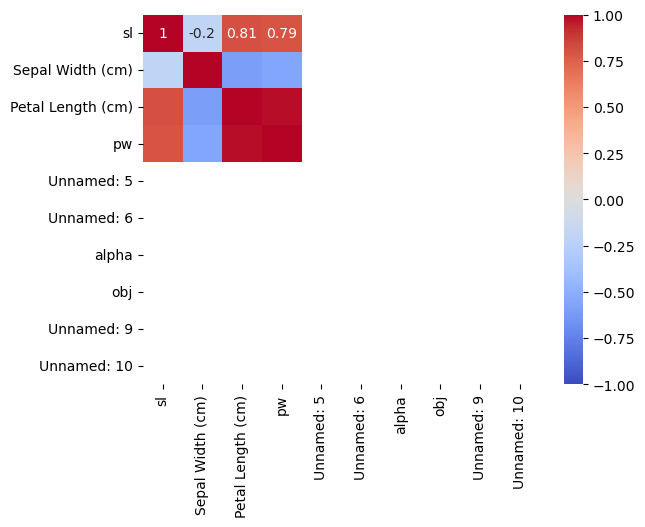

In [28]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)